# 模型选择、欠拟合和过拟合

前面学习的基于 `Fashion-Mnist` 数据集的实验中，我们评价了机器学习模型在训练数据集和测试集上的表现。但是当训练数据集更准确时，在测试集上却不一定更准确。

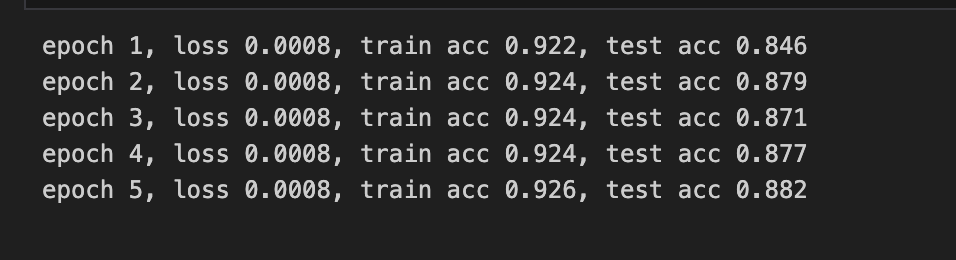

## 训练误差与泛化误差

在解释上述现象之前，我们需要区分训练误差（training error）和泛化误差（generalizationerror）。通俗来讲，前者指模型在训练数据集上表现出的误差，后者指模型在任意⼀个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似。计算训练误差和泛化误差可以使⽤之前介绍过的损失函数，例如线性回归⽤到的平⽅损失函数和softmax回归⽤到的交叉熵损失函数。

⼀般情况下，由训练数据集学到的模型参数会使模型在训练数据集上的表现优于或等于在测试数据集上的表现。由于⽆法从训练误差估计泛化误差，⼀味地降低训练误差并不意味着泛化误差⼀定会降低。

## 模型的选择

在机器学习中，通常需要评估若干候选模型的表现并从中选择模型。这一过程称为模型选择。可供选择的候选模型可以是有着不同超参数的同类模型。以多层感知机为例，我们可以选择隐藏层的个数，以及每个隐藏层中隐藏单元个数和激活函数。为了得到有效的模型，我们通常要在模型选择上下一番功夫。下面我们来描述模型选择中通常书用的验证数据集

从严格意义上讲，测试集只能在所有超参数和模型参数选定后使⽤⼀次。不可以使⽤测试数据选择模型，如调参。由于⽆法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留⼀部分在训练数据集和测试数据集以外的数据来进⾏模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。例如，我们可以从给定的训练集中随机选取⼀⼩部分作为验证集，⽽将剩余部分作为真正的训练集。

然⽽在实际应⽤中，由于数据不容易获取，测试数据极少只使⽤⼀次就丢弃。因此，实践中验证数据集和测试数据集的界限可能⽐较模糊。从严格意义上讲，除⾮明确说明，否则本书中实验所使⽤的测试集应为验证集，实验报告的测试结果（如测试准确率）应为验证结果（如验证准确率）。

## K折交叉验证

由于验证数据集不参与模型训练，当训练数据不够用时，预留大量的验证数据显得太奢侈。一种改善的方法是K折交叉验证。在K折交叉验证中，我们把原始训练数据集分割成K个不重合的子数据集，然后我们做K此模型训练和验证。每一次，我们使用一个自数据集验证模型，并使用其他K-1个子数据集来训练模型。在这K次训练和验证中，每次用来验证模型的字数据集都不同。最后，我们对这K次训练误差和验证误差分别求平均

## 欠拟合和过拟合

接下来，我们来探究模型训练中经常出现的两类经典问题：
1. **模型无法得到较低的训练误差**。我们称这种现象为欠拟合
2. **模型的训练误差远小于它在测试数据集上的误差**。我们称该现象为过拟合。

在实践中，我们要尽可能同时应对过拟合和欠拟合。虽然有很多因素可能导致这两种拟合问题，在这里重点讨论两个因素：模型复杂度和训练数据集大小。

**模型复杂度**：为了解释模型复杂度，我们以多项式函数拟合为例。给定一个有标量数据特征 $x$ 和对应的标量标签 $y$ 组成的训练数据集，多项式函数拟合的目标是找一个K阶多项式函数。

$$
\hat{y} = b + \sum_{k=1}^K x^k w_k
$$

来近似 $y$。在上式中，$w_k$ 是模型的权重参数，$b$ 为偏差参数。与线性回归相同，多项式函数拟合也使用平方损失函数。特别地，一阶多项式函数拟合又叫线性函数拟合。

因为高阶多项式函数拟合参数更多，模型函数的选择空间更大，所以高阶多项式函数比低阶多项式函数的复杂度更高。因此高阶多项式函数比低阶多项式函数更容易在相同的训练数据集上得到更低的训练误差。给定训练数据集，模型的复杂度和误差之间的关系通常如图所示。

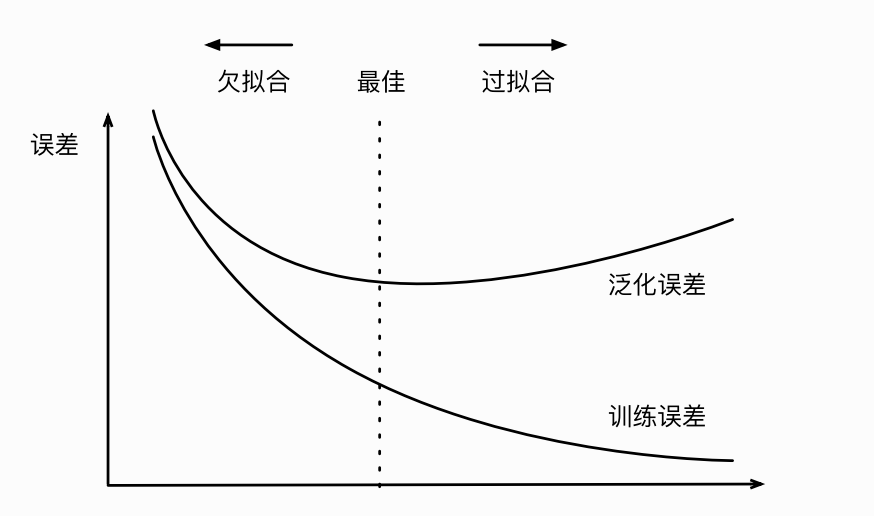

给定训练数据集，如果模型的复杂度过低，很容易出现⽋拟合；如果模型复杂度过⾼，很容易出现过拟合。应对⽋拟合和过拟合的⼀个办法是针对数据集选择合适复杂度的模型。

影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。一般来说，如果训练数据集中样本数过少，特别是比模型参数数量更少时，过拟合更容易发生。此外，泛化误差不会随着训练数据集里样本数量增加而增大。因此，我们通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。

接下来看一个多项式函数拟合的例子。

In [68]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt

In [97]:
# 生成数据集
n_train,n_test,true_w,true_b = 100,100,[1.2,-3.4,5.6],5
features = torch.randn((n_train+n_test,1)) #内层括号定义形状元组，外层括号是函数调用的语法，两者结合是为了清晰地向 torch.randn 传递张量的形状信息。（为什么要两个括号）
poly_features = torch.cat((features,torch.pow(features,2),torch.pow(features,3)),1) # .pow()乘方函数 每行1个。torch.cat() 拼接
labels = (true_w[0] * poly_features[:, 0] + true_w[1] *poly_features[:, 1] + true_w[2] * poly_features[:, 2] + true_b)
labels +=torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype=torch.float)

In [98]:
features[:2], poly_features[:2], labels[:2]

(tensor([[0.7243],
         [0.7159]]),
 tensor([[0.7243, 0.5246, 0.3799],
         [0.7159, 0.5125, 0.3669]]),
 tensor([6.2209, 6.1601]))

In [99]:
# 训练模型

def semilogy(x_vals,y_vals,x_label,y_label,x2_vals =None,y2_vals =None,legend = None,figsize=(3.5,2.5)):
    plt.figure(figsize=figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals) #核心特点：x 轴使用线性刻度，y 轴使用对数刻度。
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)


In [100]:
num_epochs,loss = 100,torch.nn.MSELoss()


In [91]:
import torch.utils

和线性回归⼀样，多项式函数拟合也使⽤平⽅损失函数。

因为我们将尝试使⽤不同复杂度的模型来拟合⽣成的数据集，所以我们把模型定义部分放在 `fit_and_plot` 函数中。

In [92]:
def fit_and_plot(train_features, test_features, train_labels, test_labels): # 这里的features 是样本，不是权重
    net = torch.nn.Linear(train_features.shape[-1], 1)
    batch_size = min(10, train_labels.shape[0]) 
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
        
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data, '\nbias:', net.bias.data)

final epoch: train loss 0.00010791697422973812 test loss 0.00016105937538668513
weight: tensor([[ 1.1971, -3.3999,  5.6016]]) 
bias: tensor([5.0011])


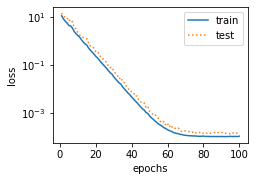

In [93]:
fit_and_plot(poly_features[:n_train,:],poly_features[n_train:,:],labels[:n_train],labels[n_train:])

## 线性函数拟合（欠拟合）

我们试试线性函数拟合。

final epoch: train loss 211.6986541748047 test loss 276.2333679199219
weight: tensor([[19.2096]]) 
bias: tensor([-2.4223])


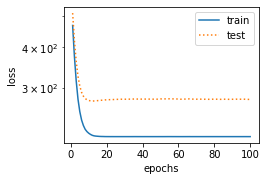

In [94]:
fit_and_plot(features[:n_train,:],features[n_train:,:],labels[:n_train],labels[n_train:])

## 训练样本不足（过拟合）

即使使用与数据生成模型同阶的三阶多项式函数模型，如果训练样本不足，容易过拟合。让我们只使用两个样本来训练模型。

final epoch: train loss 0.017521794885396957 test loss 572.6619262695312
weight: tensor([[2.0470, 2.2992, 0.8061]]) 
bias: tensor([3.0911])


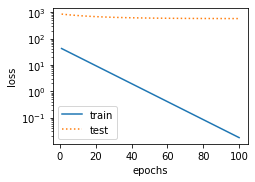

In [101]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :],labels[0:2],labels[n_train:])

## 小结

由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。机器学习模型应该关注降低泛化误差

可以使用验证数据集来进行模型选择

欠拟合指模型无法得到较低的训练误差，过拟合指模型的训练误差远小于它在测试数据集上的误差

应选择复杂度合适的模型并避免使用过少的训练样本。

# 权重衰减

上文观察了过拟合现象，即模型的训练误差远小于它的测试集误差。虽然增大训练数据可能回减轻过拟合，但是获取额外的训练数据并不容易。接下来介绍应对过拟合问题的常用方法：权重衰减

## 方法

权重衰减等价与 $L_2$ 范数正则化。正则化通过为模型损失函数添加惩罚项并使训练得到的模型参数值较小，是应对过拟合的常用手段。我们先描述 $L_2$ 范数正则化，再解释它为何又称权重衰减。

$L_2$ 范数正则化在模型原损失函数基础上添加 $L_2$ 范数惩罚项，从而得到训练所需要最小化的函数。$L_2$ 范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积。

线性回归的损失函数为

$$
\ell(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} \left( x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \right)^2
$$

为例，其中 $w_1, w_2$ 是权重参数，$b$是偏差参数，样本 $i$ 的输入为 $x_1^{(i)}, x_2^{(i)}$，标签为 $y^{(i)}$，样本数为 $n$。将权重参数用向量 $\boldsymbol{w} = [w_1, w_2]$ 表示，带有 $L_2$ 范数惩罚项的新损失函数为

$$
\ell(w_1, w_2, b) + \frac{\lambda}{2n} \|\boldsymbol{w}\|^2, 
$$

其中超参数 $\lambda >0$。当权重参数均为0，惩罚项最小。当 $\lambda$ 较大时，惩罚项在损失函数中的比重较大，这通常会使学到的权重参数元素较接近0。当 $\lambda$ 为0，则惩罚项完全不起作用。上式中 $L_2$ 范数平方 $\|\boldsymbol{w}\|^2$展开后得到$w_1^2 + w_2^2$。有了 $L_2$ 范数惩罚项后，在小批量随机梯度下降中，我们将线性回归一节中权重 $w_1$和$w_2$ 的迭代方式更改为

$$
w_1 \leftarrow \left(1 - \frac{\eta \lambda}{|\mathcal{B}|}\right) w_1 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} x_1^{(i)} \left( x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \right), 
$$

$$
w_2 \leftarrow \left(1 - \frac{\eta \lambda}{|\mathcal{B}|}\right) w_2 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} x_2^{(i)} \left( x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \right). 
$$

可见，$L_2$ 范数正则化令权重 $w_i$ 和 $w_2$ 先自乘小于1的数，再减去不含惩罚项的梯度。因此 $L_2$ 范数正则化又叫权重衰减。

权重衰减通过惩罚绝对值较⼤的模型参数为需要学习的模型增加了限制，这可能对过拟合有效。

下⾯，我们以⾼维线性回归为例来引⼊⼀个过拟合问题，并使⽤权重衰减来应对过拟合。设数据样本特征的维度为 $p$。

In [2]:
# 以高纬线性回归为例引入过拟合问题，并使用权重衰减来应对过拟合。
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np

n_train,n_test,num_inputs = 20,100,200
true_w ,true_b = torch.ones(num_inputs,1)*0.01,0.5
features = torch.randn((n_train+n_test,num_inputs))
labels = torch.mm(features,true_w)+true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype=torch.float)
train_features,test_features = features[:n_train,:],features[n_train:,:]
train_labels,test_labels = labels[:n_train],labels[n_train:]

In [ ]:
# 梯度追踪
def init_params():
    W = torch.randn((num_inputs,1),requires_grad=True)
    b = torch.zeros(1,requires_grad=True)
    return [W,b]

In [ ]:
def l2_penalty(W): #惩罚项
    return (W**2).sum()/2

In [5]:
def linreg(X,w,b): #线性模型
    return torch.mm(X,w)+b

In [6]:
def squared_loss(y_hat,y):
    return (y_hat-y.view(y_hat.size()))**2/2

In [16]:
# 定义训练和测试
import torch.utils
import matplotlib.pylab as plt
batch_size,num_epochs,lr = 1,100,0.003
net,loss = linreg,squared_loss

dataset = torch.utils.data.TensorDataset(train_features,train_labels)
train_iter = torch.utils.data.DataLoader(dataset,batch_size,shuffle=True)

def sgd(params, lr, batch_size):
    for param in params:
        # 参数更新公式：param = param - lr * (梯度 / batch_size)
        param.data -= lr * param.grad / batch_size  # in-place更新参数
        # 清零梯度，避免下一次反向传播时累积
        param.grad.data.zero_()

def semilogy(x_vals,y_vals,x_label,y_label,x2_vals =None,y2_vals =None,legend = None,figsize=(3.5,2.5)):
    plt.figure(figsize=figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals,y_vals) #核心特点：x 轴使用线性刻度，y 轴使用对数刻度。
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals,y2_vals,linestyle=':')
        plt.legend(legend)

def fit_and_plot(lambd):
    W,b = init_params()
    train_ls,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X,W,b),y)+lambd*l2_penalty(W) #这里是200维向量
            l = l.sum()
            if W.grad is not None:
                W.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            sgd([W,b],lr,batch_size)
        train_ls.append(loss(net(train_features,W,b),train_labels).mean().item())
        test_ls.append(loss(net(test_features,W,b),test_labels).mean().item())
    semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',
             range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of w:', W.norm().item())



L2 norm of w: 13.798242568969727


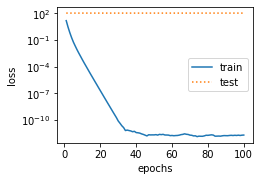

In [17]:
fit_and_plot(lambd=0)

L2 norm of w: 0.05304950103163719


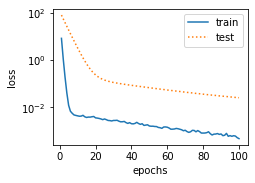

In [18]:
# 权重衰减

fit_and_plot(lambd=3)

In [19]:
def fit_and_plot_pytorch(wd):
    net = nn.Linear(num_inputs,1)
    nn.init.normal_(net.weight,mean=0,std=1)
    nn.init.normal_(net.bias,mean=0,std=1)
    optimizer_W = torch.optim.SGD(params=[net.weight],lr = lr,weight_decay=wd)
    optimizer_b = torch.optim.SGD(params=[net.bias],lr = lr)
    train_ls ,test_ls = [],[]
    for _ in range(num_epochs):
        for X,y in train_iter:
            l = loss(net(X),y).mean()
            optimizer_W.zero_grad()
            optimizer_b.zero_grad()
            l.backward()
            optimizer_W.step()
            optimizer_b.step()

        train_ls.append(loss(net(train_features),train_labels).mean().item())
        test_ls.append(loss(net(test_features),test_labels).mean().item())

    semilogy(range(1,num_epochs+1),train_ls,'epochs','loss',
             range(1,num_epochs+1),test_ls,['train','test'])
    print('L2 norm of W:',net.weight.data.norm().item())

L2 norm of W: 12.8054838180542


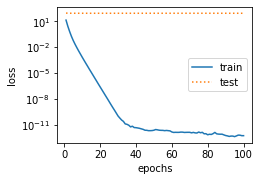

In [20]:
fit_and_plot_pytorch(0)

L2 norm of W: 0.04362381249666214


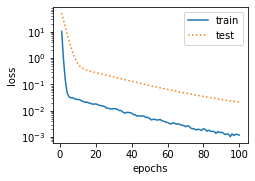

In [21]:
fit_and_plot_pytorch(5)

## 小结

正则化通过为模型损失函数添加惩罚项使血出的模型参数值较小，是应对过拟合的常用手段

权重衰减等驾驭 $L_2$ 范数正则化，通常会使学到的权重参数的元素较接近0

权重衰减可以通过优化器中的`weight_decay`超参数来指定

可以定义多个优化器实例对不同的模型参数使用不同的迭代方法

## 丢弃法

除了上文介绍的权重衰减以外，深度学习模型常常使用丢弃法来应对过拟合问题。丢弃法有一些不同的变体，这里提到的丢弃法特指倒置丢弃法

在多层感知机中描述了一个单隐藏层的多层感知机。其中输入个数为4，隐藏单元个数为5，且隐藏单元 $h_i$ 的计算表达式为：

$$
h_i = \phi \left( x_1 w_{1i} + x_2 w_{2i} + x_3 w_{3i} + x_4 w_{4i} + b_i \right)
$$

这里的 $\phi$ 为激活函数，$x_1,\dots,x_4$ 为输入，隐藏单元 $i$ 的权重参数为 $w_1,\dots,w_4$，偏差参数为 $b_i$。当对该隐藏层使用丢弃法时，该层的隐藏单元将有一定概率被丢弃掉。设丢弃概率为 $p$，那么有 $p$ 的概率 $h_i$ 会被清零，有 $1-p$ 的概率 $h_1$ 会除以 $1-p$ 做拉伸。丢弃概率是丢弃法的超参数。具体来说，设随机变量 $\xi_i$ 为0和1的概率为 $p$ 和 $1-p$。使用丢弃法时我们计算新的隐藏单元 $h'_i$

$$
h_i' = \frac{\xi_i}{1 - p} h_i
$$

由于 $E(\xi_i) = 1 - p$，因此

$$
E(h_i') = \frac{E(\xi_i)}{1 - p} h_i = h_i
$$

即丢弃法不改变输入的期望值。当我们对隐藏层使用丢弃法，一种可能如下图所示

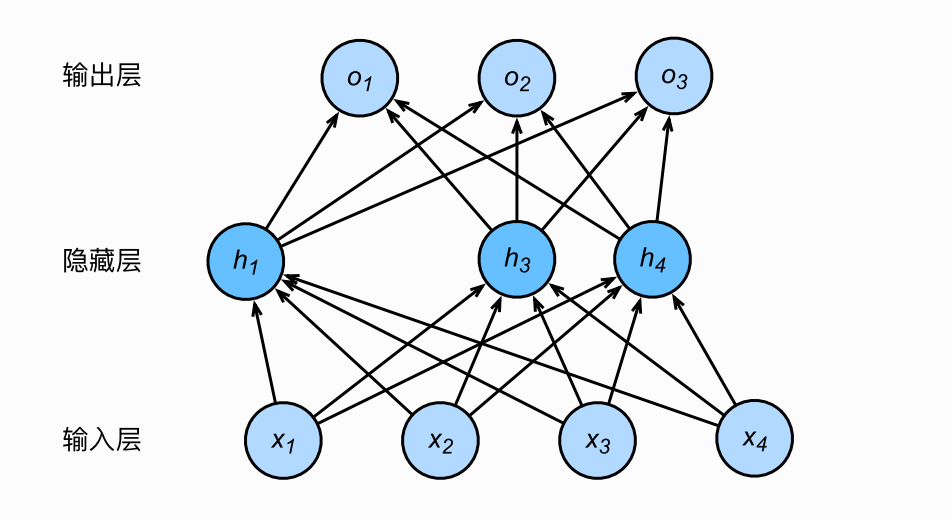

其中，$h_2$ 和 $h_5$ 被清零。这时输出值的计算不再依赖 $h_2$ 和 $h_5$，在反向传播时，与这两个隐藏单元相关的权重梯度均为0.由于在训练中隐藏层的神经元的丢弃时随机的，即 $h_1,\dots,h_5$ 都有可能被清零，输出层的计算无法过度依赖 $h1,\dots,h5$ 中的任一个，从而在训练模型时起到正则化的作用，并可以用来应对过拟合问题。在测试模型时，我们为了拿到更加确定性的结果，一般不使用丢弃法。

根据丢弃法的定义，我们很容易实现。下面的`dropout`函数将以`drop_prob` 的概率丢弃 `X`中的元素

In [ ]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import torch.utils
import torchvision
import matplotlib.pylab as plt

def dropout(X,drop_prob):
    X = X.float()
    assert 0 <= drop_prob <=1 # 如果范围出错就报错
    keep_prob = 1-drop_prob 
    if keep_prob ==0:
        return torch.zeros_like #所有的都是0
    mask = (torch.rand(X.shape)<keep_prob).float() # 生成一个与X 形状相同均匀分布的数组，小于1-p的为1 保留下来

    return mask *X / keep_prob  # 缩放补偿和输出

In [42]:
X  = torch.arange(16).view(2,8)
dropout(X,0.5)

tensor([[ 0.,  2.,  4.,  6.,  8.,  0.,  0.,  0.],
        [16.,  0., 20.,  0.,  0.,  0., 28.,  0.]])

In [ ]:
num_inputs,num_outputs,num_hiddens1,num_hiddens2 = 784,10,256,256 # 这里设置两个隐藏层

W1 = torch.tensor(np.random.normal(0,0.01,size=(num_inputs,num_hiddens1)),dtype=torch.float,requires_grad=True)
b1 = torch.zeros(num_hiddens1,requires_grad=True)
W2 = torch.tensor(np.random.normal(0,0.01,size=(num_hiddens1,num_hiddens2)),dtype=torch.float,requires_grad=True)
b2 = torch.zeros(num_hiddens2,requires_grad=True)
W3 = torch.tensor(np.random.normal(0,0.01,size=(num_hiddens2,num_outputs)),dtype=float,requires_grad=True)
b3 = torch.zeros(num_outputs,requires_grad=True)

params = [W1,b1,W2,b2,W3,b3]

In [46]:
drop_prob1,drop_prob2=0.2,0.5

def net(X,is_training=True):
    X = X.view(-1,num_inputs)
    H1 = (torch.mm(X,W1)+b1).relu()
    if is_training:
        H1 = dropout(H1,drop_prob1)
    H2 = (torch.mm(H1,W2)+b2).relu()
    if is_training:
        H2 = dropout(H2,drop_prob2)
    return torch.mm(H2,W3)+b3

In [47]:
def evaluate_accuracy(data_iter,net):
    acc_sum,n = 0.0,0
    for X,y in data_iter:
        if isinstance(net,torch.nn.Module):
            net.eval()
            acc_sum+=(net(X).argmax(dim=1)==y).float().sum.item()
            net.train()
        else:
            if('is_training' is net.__code__.co_varnames):
                acc_sum+= (net(X,is_training=False).argmax(dim=1)==y).float().sum().item()
            else:
                acc_sum+=(net(X).argmax(dim=1)==y).float().sum().item()
        n+=y.shape[0]
    return acc_sum/n

In [ ]:
import torchvision.transforms
num_epochs,lr,batch_size=5,100.0,256
loss = torch.nn.CrossEntropyLoss()
mnist_train =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=True, download=True, transform=transforms.ToTensor())
mnist_test =torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST',train=False, download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=4)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=4)